# Diabetic-Retinopathy Detection from Images

#### Alperen Taştekin
#### Mert Emre Öztürk

<font size="4">In this project, we will try to detect Diabetic-Retinopathy based on microscopic images taken from both eyes of the patients. For this, we will use a dataset containing approximately 25.5k 3 channel images. There are total of 5 classes on the dataset that do not have diabetic retinopathy and have diabetic retinopath with different stages. While trying to detect diabetic retinopathy, we will be interested in whether the disease exists or not  without considering the stage of the disease. While doing this, we will do binary classification with the Logistic Regression algorithm. However, instead of using ready libraries, we will implement the Logistic Regression algorithm step by step manually.</font>

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

<font size="4">Diabetic retinopathy is one of the most important diseases that cause blindness today. The diagnosis is made by experts by looking at the microscopic images taken from the patients. The dataset that we will use includes microscopic images taken from both eyes of the patients. Our aim is to develop a model that will give an idea to the experts about the diagnosis of the disease. With the model that we will develop, experts will be informed about whether the patient has diabetic retinopathy, even if they cannot know the stage of the disease. We will separately develop two models for images taken from the left eye and images taken from the right eye of the patients. In this way, we expect it to work more sensitively and accurately.</font>

## Data Understanding<a class="anchor" id="data_understanding"></a>

<font size="4">First, let's call the libraries we will use throughout the project and try to get to know our dataset.</font>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
import math
import os
import glob
from PIL import Image,ImageOps
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score

In [2]:
os.listdir('/kaggle/input/diabetic-rateinopathy-full/')

['trainLabels.csv',
 'df3.csv',
 'df2.csv',
 '224 diminsion',
 'df4.csv',
 'TEST_Resizedvgg net',
 'test_resizedvgg net',
 'df0.csv',
 'df1.csv',
 'TRAIN_Resizedvgg net',
 'train_resizedvgg net',
 'test']

<font size="4">We said that there are 5 classes in our dataset. Here is the dataframe containing the conditions with df0 non diabetic retinopathy. df1_4 are the cases where diabetic retionapthy is seen but the stage of the disease is different. The "train_resizedvgg net" file contains our microscopic images and the "trainLabels.csv" contains the label values of the images. The "trainLabels.csv" file is a collection of information in files such as df0,df1 in one place. Now let's visualize the csv files containing the labels and some sample images.</font>

In [3]:
df0 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df0.csv')
df0.head(5)

,Unnamed: 0,image,level,PatientId,path,exists,eye,level_cat
0,0,10_left,0,10,F:\FYP DATASET\images\resizedvgg net\10_left.jpeg,False,1,[1. 0. 0. 0. 0.]
1,1,10_right,0,10,F:\FYP DATASET\images\resizedvgg net\10_right....,False,0,[1. 0. 0. 0. 0.]
2,2,13_left,0,13,F:\FYP DATASET\images\resizedvgg net\13_left.jpeg,False,1,[1. 0. 0. 0. 0.]
3,3,13_right,0,13,F:\FYP DATASET\images\resizedvgg net\13_right....,False,0,[1. 0. 0. 0. 0.]
4,8,17_left,0,17,F:\FYP DATASET\images\resizedvgg net\17_left.jpeg,False,1,[1. 0. 0. 0. 0.]


<font size="4">As can be seen, the df0 data contains information about patients without diabetic retinopathy. The fact that the "exist" column value is False indicates this. "level_cat" specifies the class value. These values are prepared with the "one hot encoding" logic. For example, these values are [0,1,0,0,0] for file df1 and [0,0,1,0,0] for file df2. However, since we do binary classification and do not care about the degree of the disease, we will assign a label such as 1 if there is diabetic retionapthy, otherwise 0. There are also variables in the dataframe, which eye it belongs to and where the file path for the image is kept.</font>

In [4]:
trainLabels = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/trainLabels.csv')
trainLabels

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


<font size="4">Here are the names of all the image files in the dataset and the corresponding class. As we mentioned before, level 0 denotes non-diabetic retinopathy, and 1-4 denotes diabetic retinopathy with different stages. Although we have 35k row correspond to trainLabels we have not many images, we will select some sample and will not use all of the dataset. Finally, let's show some of the images in dataset.</font>

In [5]:
def showImages(filePath,title):
    image = img.imread(filePath)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label=title,loc='center')
    print("Image Shape:",image.shape)

Image Shape: (224, 224, 3)


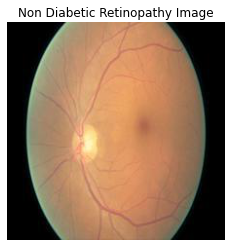

In [6]:
filePath = '/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel0/'
images = os.listdir(filePath)
showImages(filePath+"/"+images[0],"Non Diabetic Retinopathy Image")

Image Shape: (224, 224, 3)


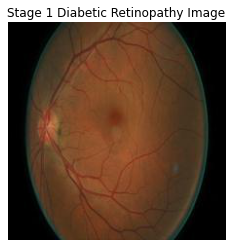

In [7]:
filePath = '/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel1/'
images = os.listdir(filePath)
showImages(filePath+"/"+images[0],"Stage 1 Diabetic Retinopathy Image")

Image Shape: (224, 224, 3)


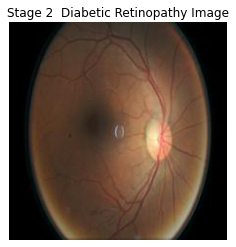

In [8]:
filePath = '/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel2/'
images = os.listdir(filePath)
showImages(filePath+"/"+images[0],"Stage 2  Diabetic Retinopathy Image")

Image Shape: (224, 224, 3)


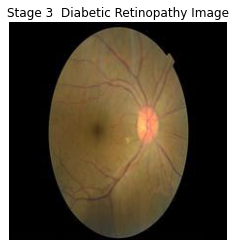

In [9]:
filePath = '/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel3/'
images = os.listdir(filePath)
showImages(filePath+"/"+images[0],"Stage 3  Diabetic Retinopathy Image")

Image Shape: (224, 224, 3)


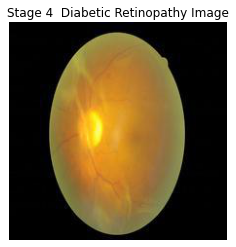

In [10]:
filePath = '/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel4/'
images = os.listdir(filePath)
showImages(filePath+"/"+images[0],"Stage 4  Diabetic Retinopathy Image")

<font size="4">The first image above is related to patient who has diabetic retinopathy, and the other images are microscopic images of patients with diabetic retinopathy with  different stages from 1 to 4.</font>

## Data Preparation<a class="anchor" id="data_preparation"></a>

<font size="4">In the data preparation part,we will first split our images left and right then we will create two models both of them.Another important point is that we will do binary classification that checked diabetic retinopathy exist or not.While doing this we will implement our Logistic Regression algorithm from scratch.First dataset include left eyes images with diabetic and non diabetic retinopathy and second dataset same on right eyes images.We work on one channel gray images so we convert image from RGB channel to gray-scale image. Then we convert our images to numpy array and store this.Finally, because of our data include high numbers of image and images have high pixel values, we resize the images and select some samples from the dataset instead of using all dataset.We also create labels</font>

<font size="4">Firstly we start the select random samples our dataset instead of using all of dataset.</font>

In [11]:
df0 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df0.csv')
df1 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df1.csv')
df2 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df2.csv')
df3 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df3.csv')
df4 = pd.read_csv('/kaggle/input/diabetic-rateinopathy-full/df4.csv')
print("Total number of non diabetic images",df0.shape[0])
print("Total number of stage 1 images",df1.shape[0])
print("Total number of stage 2 images",df2.shape[0])
print("Total number of stage 3 images",df3.shape[0])
print("Total number of stage 4 images",df4.shape[0])
print("Total number of diabetic images",df4.shape[0]+df3.shape[0]+df2.shape[0]+df1.shape[0])

Total number of non diabetic images 25810
Total number of stage 1 images 2443
Total number of stage 2 images 5292
Total number of stage 3 images 873
Total number of stage 4 images 708
Total number of diabetic images 9316


<font size="4">While looking images count, we decided to use 9k non diabetic and 9k diabetic images but after we checked images count is different shown ondataframes, we found 6611 diabetic retinopathy images so we select 6.5k non diabetic and 6.5k diabetic images  with below codes.</font>

In [12]:
diabeticImagesPath = []
allOfImagesFolders= glob.glob('/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/*')
for folder in allOfImagesFolders:
    if(folder!="/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel0"):
        allOfImagesFilePath = glob.glob(folder+'/*')
        diabeticImagesPath+=allOfImagesFilePath
diabeticImagesPath = random.choices(population=diabeticImagesPath, k=6500)

nonDiabeticImagesPaths = random.choices(population=glob.glob('/kaggle/input/diabetic-rateinopathy-full/TRAIN_Resizedvgg net/Tlevel0/*'), k=6500)
print("Diabetic Images Count:",len(diabeticImagesPath))
print("Non Diabetic Images Count:",len(nonDiabeticImagesPaths))

Diabetic Images Count: 6500
Non Diabetic Images Count: 6500


<font size="4">Lets we split our data left and right eyes images.</font>

In [13]:
leftDiabeticImagesPath = []
rightDiabeticImagesPath = []
leftNonDiabeticImagesPath = []
rightNonDiabeticImagesPath = []

for diabeticImage in diabeticImagesPath:
    if 'left' in diabeticImage:
        leftDiabeticImagesPath.append(diabeticImage)
    else:
        rightDiabeticImagesPath.append(diabeticImage)

for nonDiabeticImage in nonDiabeticImagesPaths:
    if 'left' in nonDiabeticImage:
        leftNonDiabeticImagesPath.append(nonDiabeticImage)
    else:
        rightNonDiabeticImagesPath.append(nonDiabeticImage)
        

print("Left Eye Diabetic Images Count:",len(leftDiabeticImagesPath))
print("Right Eye Diabetic Images Count:",len(rightDiabeticImagesPath))
print("Left Eye Non Diabetic Images Count:",len(leftNonDiabeticImagesPath))
print("Right Eye Non Diabetic Images Count:",len(rightNonDiabeticImagesPath))

Left Eye Diabetic Images Count: 3272
Right Eye Diabetic Images Count: 3228
Left Eye Non Diabetic Images Count: 3236
Right Eye Non Diabetic Images Count: 3264


<font size="4">Create our two dataset which are left eyes images and right eyes images regardless of retinopathy is exist or not. After doing that we have two main dataset. One of them include left eyes diabetic and non diabetic images, other one include right eyes diabetic and non diabetic images.</font>

In [14]:
leftEyesImagesFilePath = leftDiabeticImagesPath+leftNonDiabeticImagesPath
rightEyesImageFilePath = rightDiabeticImagesPath+rightNonDiabeticImagesPath
print("Left Eyes Dataset Images Count:",len(leftEyesImagesFilePath))
print("Right Eyes Dataset Images Count:",len(rightEyesImageFilePath))

Left Eyes Dataset Images Count: 6508
Right Eyes Dataset Images Count: 6492


<font size="4">Lets store our images  as numpy array, while doing this convert image gray scale and resize image. We resize the images because of computational resources and runtime problems.</font>

In [15]:
leftEyesImages = []
leftEyesLabels = []
totalLeftEyesImages = 0

rightEyesImages = []
rightEyesLabels = []
totalRightEyesImages = 0


for image in leftEyesImagesFilePath:
        imageData = Image.open(image).resize((64,64))
        #Convert image to grayscale
        grayImage = ImageOps.grayscale(imageData)
        pixel = np.asarray(grayImage)
        splitArray = image.split("/")
        imageName = splitArray[-1].split(".")[0]
        index = trainLabels["image"]==imageName
        label = trainLabels[index].values[0][1]
        # binary classification so two class not exist:0 exist:1
        if(label>1):
            label=1
        leftEyesLabels.append(label)
        leftEyesImages.append(pixel)
        totalLeftEyesImages +=1


for image in rightEyesImageFilePath:
        imageData = Image.open(image).resize((64,64))
        #Convert image to grayscale
        grayImage = ImageOps.grayscale(imageData)
        pixel = np.asarray(grayImage)
        splitArray = image.split("/")
        imageName = splitArray[-1].split(".")[0]
        index = trainLabels["image"]==imageName
        label = trainLabels[index].values[0][1]
        # binary classification so two class not exist:0 exist:1
        if(label>1):
            label=1
        rightEyesLabels.append(label)
        rightEyesImages.append(pixel)
        totalRightEyesImages +=1


        
print(totalLeftEyesImages)
print(totalRightEyesImages)

6508
6492


In [16]:
#Convert numpy array
leftEyesImages = np.array(leftEyesImages,dtype=float)
leftEyesLabels = np.array(leftEyesLabels,dtype=int)
rightEyesImages = np.array(rightEyesImages,dtype=float)
rightEyesLabels = np.array(rightEyesLabels,dtype=int)

<font size="4">With above cell we store all of images in numpy format.Lets we normalize our pixel values with divde by 255 .</font>

In [17]:
leftEyesImages = leftEyesImages/255.0
rightEyesImages = rightEyesImages/255.0

<font size="4">We don't do any feature selecting because of we work on images and then use all of pixel values.</font>

<font size="4">Lets we split our dataset train,validation and test part for both of eyes images.</font>

In [18]:
X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(leftEyesImages, leftEyesLabels, test_size=0.1, random_state=42)
X_train_L, X_val_L, Y_train_L, Y_val_L = train_test_split(X_train_L, Y_train_L, test_size=0.3, random_state=42)

X_train_R, X_test_R, Y_train_R, Y_test_R = train_test_split(rightEyesImages, rightEyesLabels, test_size=0.1, random_state=42)
X_train_R, X_val_R, Y_train_R, Y_val_R = train_test_split(X_train_R, Y_train_R, test_size=0.1, random_state=42)

In [19]:
X_train_L = X_train_L.reshape(X_train_L.shape[0],4096).T
X_test_L = X_test_L.reshape(X_test_L.shape[0],4096).T
X_val_L = X_val_L.reshape(X_val_L.shape[0],4096).T
X_train_R = X_train_R.reshape(X_train_R.shape[0],4096).T
X_test_R = X_test_R.reshape(X_test_R.shape[0],4096).T
X_val_R = X_val_R.reshape(X_val_R.shape[0],4096).T

Y_train_L = Y_train_L.reshape(1,Y_train_L.shape[0])
Y_test_L = Y_test_L.reshape(1,Y_test_L.shape[0])
Y_val_L = Y_val_L.reshape(1,Y_val_L.shape[0])
Y_train_R = Y_train_R.reshape(1,Y_train_R.shape[0])
Y_test_R = Y_test_R.reshape(1,Y_test_R.shape[0])
Y_val_R = Y_val_R.reshape(1,Y_val_R.shape[0])

In [20]:
print("Left Eyes Traın Images Shape:",X_train_L.shape)
print("Left Eyes Test Images Shape:",X_test_L.shape)
print("Left Eyes Validation Images Shape:",X_val_L.shape)
print("Right Eyes Traın Images Shape:",X_train_R.shape)
print("Right Eyes Test Images Shape:",X_test_R.shape)
print("Right Eyes Validation Images Shape:",X_val_R.shape)
print("--------")
print("Left Eyes Traın Images Labels Shape:",Y_train_L.shape)
print("Left Eyes Test Images Labels Shape:",Y_test_L.shape)
print("Left Eyes Validation Images Labels Shape:",Y_val_L.shape)
print("Right Eyes Traın Images Labels Shape:",Y_train_R.shape)
print("Right Eyes Test Images Labels Shape:",Y_test_R.shape)
print("Right Eyes Validation Images Labels Shape:",Y_val_R.shape)

Left Eyes Traın Images Shape: (4096, 4099)
Left Eyes Test Images Shape: (4096, 651)
Left Eyes Validation Images Shape: (4096, 1758)
Right Eyes Traın Images Shape: (4096, 5257)
Right Eyes Test Images Shape: (4096, 650)
Right Eyes Validation Images Shape: (4096, 585)
--------
Left Eyes Traın Images Labels Shape: (1, 4099)
Left Eyes Test Images Labels Shape: (1, 651)
Left Eyes Validation Images Labels Shape: (1, 1758)
Right Eyes Traın Images Labels Shape: (1, 5257)
Right Eyes Test Images Labels Shape: (1, 650)
Right Eyes Validation Images Labels Shape: (1, 585)


<font size="4">We rehsape our images and their labels this format because we will matrix multiplication in the next steps inside forward propagation so we have to do these reshape and transpose operations.</font>

## Modeling<a class="anchor" id="modeling"></a>

<font size="4">Firstly we initialize our weights.Because of we use Sigmoid activation function at the end of the algorithm lets we use Xavier Weights Initialization methods.The xavier initialization method is calculated as a random number with a uniform probability distribution between the range -(1/sqrt(n)) and 1/sqrt(n), where n is the number of weights node. In our situation we have 4096 nodes in the weights because of each images has 4096 pixels,so we initiliaze our weights range -(1/sqrt(4096)) and 1/sqrt(4096).</font>

In [31]:
weights = np.random.uniform(low = -(1/math.sqrt(4096)),high = 1/math.sqrt(4096),size = (4096,1))
print(weights)
print(weights.shape)

[[ 0.00885563]
 [ 0.00063746]
 [-0.00469292]
 ...
 [ 0.00137915]
 [ 0.00685208]
 [-0.00296093]]
(4096, 1)


<font size="4">Here we initalize bias,learning rate and epochs numbers. While doing this we select bias 0.01 because of most of the cases bias initialize 0 or 0.01. We can implement alogrithm from scratch instead of ready library so we have to do a lot of iteration include backward and forward propagation and we cannot select learning rate too small because it gives me more runtime again because of we implement algorithm from scratch.So we select learningRate 0.02 (we try bigger numbers but it cannot work correctly) and epochs (iterations) 50000 .</font>

In [32]:
bias = 0.01
learningRate = 0.02
epochs = 60000

<font size="4">We have use sigmoid activation function because we find the probabilistic results about images is diabetic or not. Because of we do binary classification we can assume that if probabilsitic results >=0.5 it means diabetic images, and if results <0.5 it means non diabetic images. We can impelement sigmoid funciton with use its math formula.</font>


In [33]:
def sigmoid(z):
    probabilisticResults = 1/(1+np.exp(-z))
    return probabilisticResults

<font size="4">We use Binary Cross-Entropy that other name is Log Loss loss functions because we do binary classification and we have 2 class.We implement this loss function with using its math formula.</font>

In [34]:
def binaryCrossEntropy(predictedValue,Y_train):
    return -(Y_train * np.log(predictedValue) + (1 - Y_train) * np.log(1 - predictedValue))

In [35]:
def forwardPropagation(weights,bias,X_train,Y_train):
    z = np.dot(weights.T,X_train) + bias
    predictedValue = sigmoid(z)
    lossResults = binaryCrossEntropy(predictedValue,Y_train)
    cost = np.sum(lossResults)
    #Scaling loss
    return cost/Y_train.shape[1],predictedValue

<font size="4">After we predict results and calculate loss function then we have to update our weights and bias values based on our loss value. At this point we use Gradient Descent optimization algorithm. This algorithm uses partial derivative and update weights and bias values with using loss value.After that we expect our model make better predictions.</font>

In [36]:
def backwardPropagation(weights,bias,X_train,Y_train,predictedValue,learningRate):    
    weightsDerivative = (1/Y_train.shape[1]) * np.dot(X_train,(predictedValue-Y_train).T)
    biasDerivative = (1/Y_train.shape[1]) * np.sum((predictedValue-Y_train))
    weights = weights - learningRate * weightsDerivative
    bias = bias - learningRate * biasDerivative
    return weights,bias

<font size="4">Here we define our prediction functions. While measuring models metrics and predict eye have diabetic retinopathy or not we need it. We do binary classificaiton so if model prediction bigger than 0.5 it means that 1 and otherwise 0 for us.</font>

In [37]:
def predict(weight,bias,X_test,y_test):
    z = np.dot(weights.T,X_test) + bias
    predictedValue = sigmoid(z)
    predictions = []
    for i in predictedValue[0]:
        if(i<0.5):
            predictions.append(0)
        else:
            predictions.append(1)
    return predictions

<font size="4">In our logistic regression algorithm we have a lot of forward and backward propagation. We do forward propagation and calculate cost functions and correspond to loss funcitons we update our bias and weights with using Gradient Descent partial derivative.We save our train loss,validation loss,train and validation accuracy each 100 epochs. And we controll something inside the algortihm. Firstly if our loss function is increase in training part we stop the training and secondly we check overfitting with looking our train and validation loss.If 20 times although train loss decrease and validation loss increase we stop training because of it might be overfitting here.</font>

In [38]:
def LogisticRegression(weights,bias,X_train,Y_train,X_test,Y_test,learningRate,epochs):
    trainCosts = []
    testCosts = []
    trainAccuracy = []
    testAccuracy = []
    Weights = weights
    Bias = bias
    flag = True
    checkCounter = 100
    anomaly = 0 # This variable check that train and validation cost is going differently and ,t might be overfitting
    for i in range(epochs):
        train_cost,predictedValue = forwardPropagation(Weights,Bias,X_train,Y_train)
        Weights,Bias = backwardPropagation(Weights,Bias,X_train,Y_train,predictedValue,learningRate)
        if(len(trainCosts)==0):
            trainCosts.append(train_cost)
            test_cost,testPredictedValue = forwardPropagation(Weights,Bias,X_test,Y_test)
            testCosts.append(test_cost)
            checkCounter-=1
            
            
            trainPredictions = predict(Weights,Bias,X_train,Y_train)
            tn, fp, fn, tp = confusion_matrix(Y_train.reshape(Y_train.shape[1]), trainPredictions).ravel()
            accuracyRate = (tp+tn) / (tp+tn+fp+fn)
            trainAccuracy.append(accuracyRate)
            
            
            testPredictions = predict(Weights,Bias,X_test,Y_test)
            tn, fp, fn, tp = confusion_matrix(Y_test.reshape(Y_test.shape[1]), testPredictions).ravel()
            accuracyRate = (tp+tn) / (tp+tn+fp+fn)
            testAccuracy.append(accuracyRate)
            
            continue
        elif(checkCounter ==0):
            trainCosts.append(train_cost)
            test_cost,testPredictedValue = forwardPropagation(Weights,Bias,X_test,Y_test)
            testCosts.append(test_cost)
            
            
            
            trainPredictions = predict(Weights,Bias,X_train,Y_train)
            tn, fp, fn, tp = confusion_matrix(Y_train.reshape(Y_train.shape[1]), trainPredictions).ravel()
            accuracyRate = (tp+tn) / (tp+tn+fp+fn)
            trainAccuracy.append(accuracyRate)
            
            
            testPredictions = predict(Weights,Bias,X_test,Y_test)
            tn, fp, fn, tp = confusion_matrix(Y_test.reshape(Y_test.shape[1]), testPredictions).ravel()
            accuracyRate = (tp+tn) / (tp+tn+fp+fn)
            testAccuracy.append(accuracyRate)
            
            
            
            
            
            
            if(testCosts[-1]>testCosts[-2]):
                anomaly+=1
                if(anomaly==20):
                   return trainCosts,testCosts,Weights,Bias,trainAccuracy,testAccuracy 
            elif(anomaly!=0):
                anomaly-=1
            
            if(trainCosts[-1]>trainCosts[-2]):
                return trainCosts,testCosts,Weights,Bias,trainAccuracy,testAccuracy 
            checkCounter=100
        checkCounter-=1
        
    return trainCosts,testCosts,Weights,Bias,trainAccuracy,testAccuracy 

<font size="4">Lets we define visualization function for draw our loss values plots.</font>

In [39]:
def drawLineGraph(x,y,title,xlabel,ylable):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylable)
    plt.plot(x, y)
    plt.show()

<font size="4">Lets firstly create and train model for left eye images. </font>

In [40]:
trainCostsForEachEpoch = []
validationCostsForEachEpoch = []
trainAccuracies = []
validationAccuracies = []
Weights = [weights]
Bias = [bias]
for i in range(3):
    trainCosts,testCosts,weights,bias,trainAcuracy,validationAccuray = LogisticRegression(Weights[0],Bias[0],X_train_L,Y_train_L,X_val_L,Y_val_L,learningRate,epochs)
    Weights[0] = weights
    Bias[0] = bias
    trainCostsForEachEpoch.append(trainCosts)
    validationCostsForEachEpoch.append(testCosts)
    trainAccuracies.append(trainAcuracy)
    validationAccuracies.append(validationAccuray)

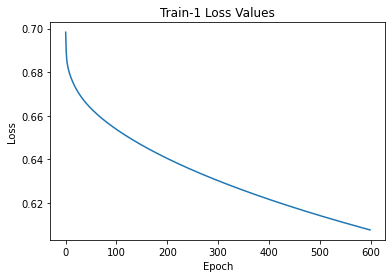

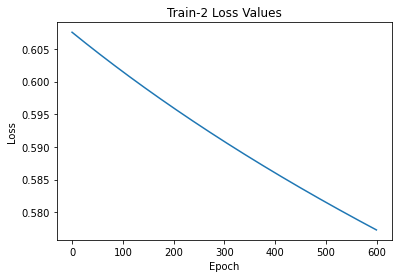

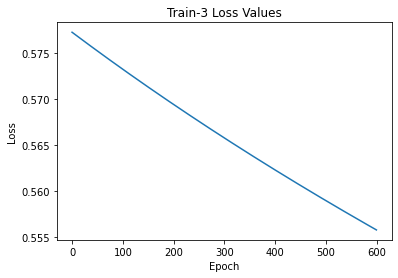

In [42]:
drawLineGraph(np.arange(len(trainCostsForEachEpoch[0])),trainCostsForEachEpoch[0],"Train-1 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(trainCostsForEachEpoch[1])),trainCostsForEachEpoch[1],"Train-2 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(trainCostsForEachEpoch[2])),trainCostsForEachEpoch[2],"Train-3 Loss Values","Epoch","Loss")

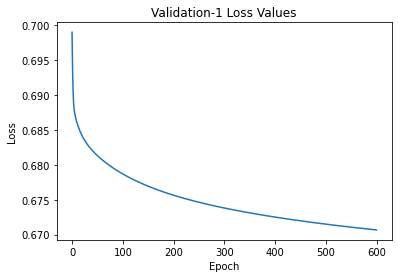

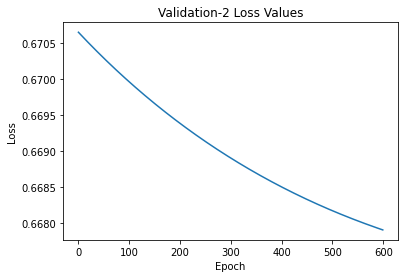

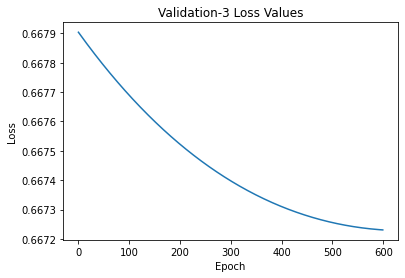

In [43]:
drawLineGraph(np.arange(len(validationCostsForEachEpoch[0])),validationCostsForEachEpoch[0],"Validation-1 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(validationCostsForEachEpoch[1])),validationCostsForEachEpoch[1],"Validation-2 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(validationCostsForEachEpoch[2])),validationCostsForEachEpoch[2],"Validation-3 Loss Values","Epoch","Loss")

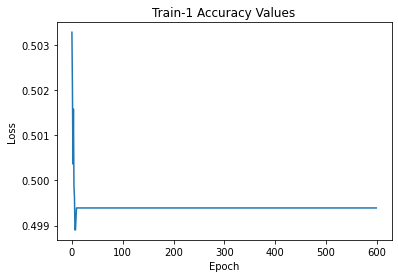

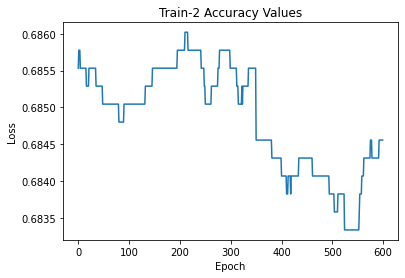

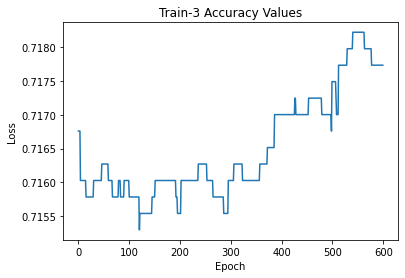

In [46]:
drawLineGraph(np.arange(len(trainAccuracies[0])),trainAccuracies[0],"Train-1 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(trainAccuracies[1])),trainAccuracies[1],"Train-2 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(trainAccuracies[2])),trainAccuracies[2],"Train-3 Accuracy Values","Epoch","Accuracy")

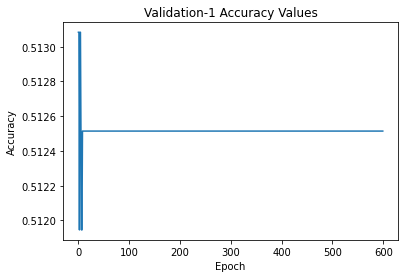

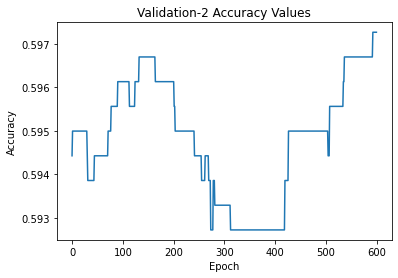

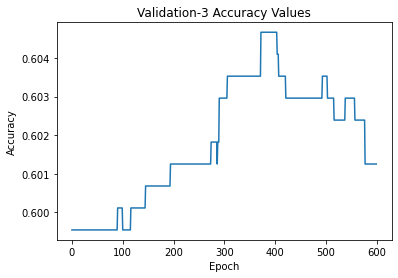

In [55]:
drawLineGraph(np.arange(len(validationAccuracies[0])),validationAccuracies[0],"Validation-1 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(validationAccuracies[1])),validationAccuracies[1],"Validation-2 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(validationAccuracies[2])),validationAccuracies[2],"Validation-3 Accuracy Values","Epoch","Accuracy")

<font size="4">Lets we do same operations  for right eyes models again.</font>

In [63]:
weightsRight = np.random.uniform(low = -(1/math.sqrt(4096)),high = 1/math.sqrt(4096),size = (4096,1))
print(weightsRight)
print(weightsRight.shape)

[[-0.00064461]
 [-0.00345183]
 [-0.0046039 ]
 ...
 [-0.00224035]
 [-0.01176528]
 [ 0.01394742]]
(4096, 1)


In [48]:
biasRight = 0.01
learningRateRight = 0.02
epochsRight = 60000

In [49]:
trainCostsForEachEpochRight = []
validationCostsForEachEpochRight = []
trainAccuraciesRight = []
validationAccuraciesRight = []
WeightsRight = [weightsRight]
BiasRight = [biasRight]
for i in range(3):
    trainCostsRight,validationCostsRight,weightsRight,biasRight,trainAcuracyRight,validationAccurayRight = LogisticRegression(WeightsRight[0],BiasRight[0],X_train_R,Y_train_R,X_val_R,Y_val_R,learningRateRight,epochsRight)
    WeightsRight[0] = weightsRight
    BiasRight[0] = biasRight
    trainCostsForEachEpochRight.append(trainCostsRight)
    validationCostsForEachEpochRight.append(validationCostsRight)
    trainAccuraciesRight.append(trainAcuracyRight)
    validationAccuraciesRight.append(validationAccurayRight)

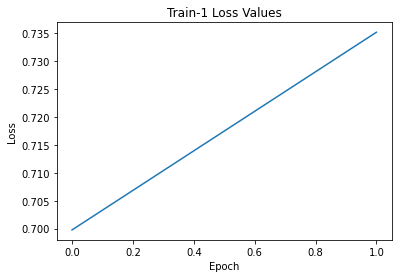

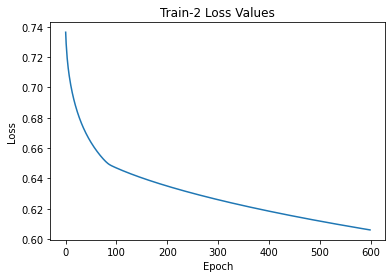

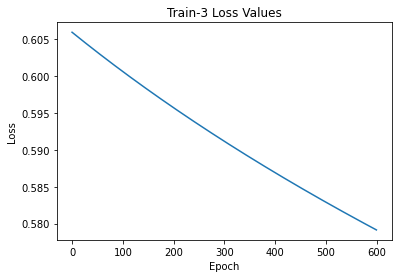

In [50]:
drawLineGraph(np.arange(len(trainCostsForEachEpochRight[0])),trainCostsForEachEpochRight[0],"Train-1 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(trainCostsForEachEpochRight[1])),trainCostsForEachEpochRight[1],"Train-2 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(trainCostsForEachEpochRight[2])),trainCostsForEachEpochRight[2],"Train-3 Loss Values","Epoch","Loss")

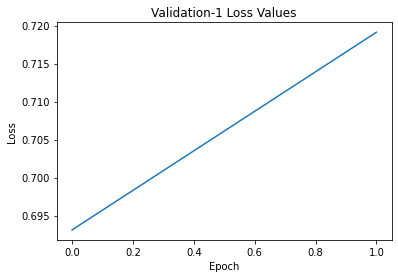

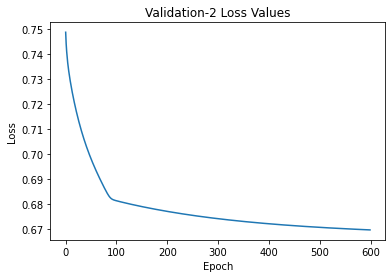

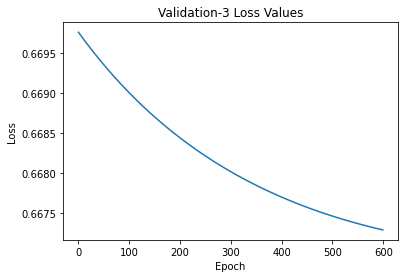

In [52]:
drawLineGraph(np.arange(len(validationCostsForEachEpochRight[0])),validationCostsForEachEpochRight[0],"Validation-1 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(validationCostsForEachEpochRight[1])),validationCostsForEachEpochRight[1],"Validation-2 Loss Values","Epoch","Loss")
drawLineGraph(np.arange(len(validationCostsForEachEpochRight[2])),validationCostsForEachEpochRight[2],"Validation-3 Loss Values","Epoch","Loss")

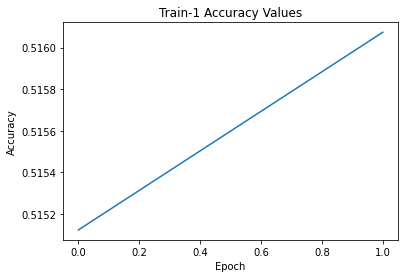

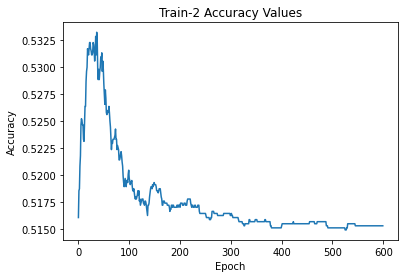

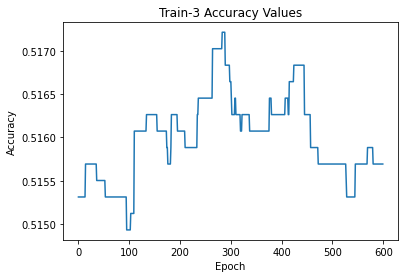

In [53]:
drawLineGraph(np.arange(len(trainAccuraciesRight[0])),trainAccuraciesRight[0],"Train-1 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(trainAccuraciesRight[1])),trainAccuraciesRight[1],"Train-2 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(trainAccuraciesRight[2])),trainAccuraciesRight[2],"Train-3 Accuracy Values","Epoch","Accuracy")

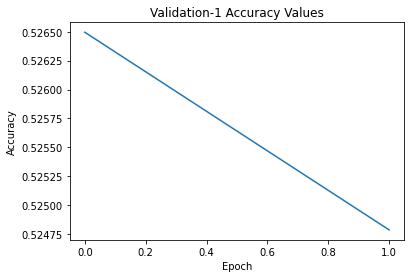

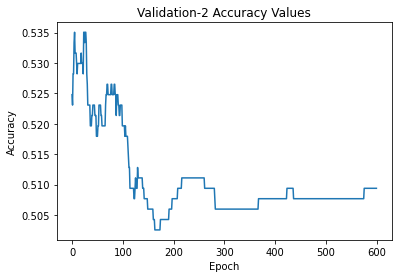

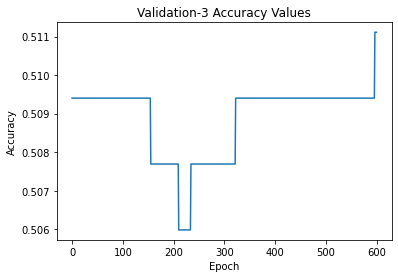

In [54]:
drawLineGraph(np.arange(len(validationAccuraciesRight[0])),validationAccuraciesRight[0],"Validation-1 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(validationAccuraciesRight[1])),validationAccuraciesRight[1],"Validation-2 Accuracy Values","Epoch","Accuracy")
drawLineGraph(np.arange(len(validationAccuraciesRight[2])),validationAccuraciesRight[2],"Validation-3 Accuracy Values","Epoch","Accuracy")

## Evaluation<a class="anchor" id="evaluation"></a>

<font size="4">Firstly we evaluate our left eyes models on test images which are create splitting parts.</font>

In [57]:
predictions = predict(Weights[0],Bias[0],X_test_L,Y_test_L)

In [58]:
tn, fp, fn, tp = confusion_matrix(Y_test_L.reshape(Y_test_L.shape[1]), predictions).ravel()
print("True Positive : ",tp)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Negative : ",tn)

True Positive :  179
False Positive :  137
False Negative :  145
True Negative :  190


In [59]:
truePositiveRate = tp/(tp+fn)
accuracyRate = (tp+tn) / (tp+tn+fp+fn)
misclassificationRate = (fp+fn) / (fp+fn+tp+tn)
trueNegativeRate = tn / (tn+fp)
f1 = f1_score(Y_test_L.reshape(Y_test_L.shape[1]), predictions, average='weighted') 

print("Accuracy Rate : ",accuracyRate)
print("True Positive Rate : ",truePositiveRate)
print("Error Rate : ",misclassificationRate)
print("True Negative Rate : ",trueNegativeRate)
print("F1 Score: ", f1)

Accuracy Rate :  0.5668202764976958
True Positive Rate :  0.5524691358024691
Error Rate :  0.43317972350230416
True Negative Rate :  0.581039755351682
F1 Score:  0.5667303033678144


<font size="4">Secondly we evaluate our right eyes models on test images which are create splitting parts.</font>

In [60]:
predictions = predict(WeightsRight[0],BiasRight[0],X_test_R,Y_test_R)

In [61]:
tn, fp, fn, tp = confusion_matrix(Y_test_R.reshape(Y_test_R.shape[1]), predictions).ravel()
print("True Positive : ",tp)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Negative : ",tn)

True Positive :  168
False Positive :  121
False Negative :  173
True Negative :  188


In [62]:
truePositiveRate = tp/(tp+fn)
accuracyRate = (tp+tn) / (tp+tn+fp+fn)
misclassificationRate = (fp+fn) / (fp+fn+tp+tn)
trueNegativeRate = tn / (tn+fp)
f1 = f1_score(Y_test_R.reshape(Y_test_R.shape[1]), predictions, average='weighted') 

print("Accuracy Rate : ",accuracyRate)
print("True Positive Rate : ",truePositiveRate)
print("Error Rate : ",misclassificationRate)
print("True Negative Rate : ",trueNegativeRate)
print("F1 Score: ", f1)

Accuracy Rate :  0.5476923076923077
True Positive Rate :  0.49266862170087977
Error Rate :  0.4523076923076923
True Negative Rate :  0.6084142394822006
F1 Score:  0.5465778798316112


<font size="4">In conclusion,we implement Logistic Regression from scratch which include forward propagation,activaiton function,loss funciton,backward propagation and update weights,bias. At the end, both of our model don't get high accuracy for predicting but also if we continue to train our model we get better results. Because of RAM, computing power and CPU limitations we train our model only this number of epochs.In addition, we have created a model that is implemented manually without using the library and works smoothly.
</font>

## References<a class="anchor" id="references"></a>

<font size="4">
    [1] https://www.kaggle.com/datasets/sohaibanwaar1203/diabetic-rateinopathy-full <br>
    [2] https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ <br>
    [3] https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook <br>
    [4] https://towardsdatascience.com/calculating-gradient-descent-manually-6d9bee09aa0b <br>
    [5] https://brandinho.github.io/cost-function-gradients/ <br>
    [6] https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f  <br>
    [7] https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/#:~:text=Weight%20initialization%20is%20a%20procedure,of%20the%20neural%20network%20model.  <br>
    [8] https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6  <br>
    [9] https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a  <br>
    [10] https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/ <br>
    [11] https://theopetunde.medium.com/a-step-by-step-tutorial-on-coding-neural-network-logistic-regression-model-from-scratch-5f9025bd3d6 <br>
    
    
</font>

<font size="4">
**Disclaimer!** <font color='grey'>This notebook was prepared by <Alperen Tastekin, Mert Emre Ozturk> as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.


</font>
</font>